In [45]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st
from sklearn import preprocessing 
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score,KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
cap= pd.read_csv('a.csv')

In [55]:
cap

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


The given data represents web traaffic analysis with detals of  Revenue is generated from a website and it's different pages from 12330 users and the goal is to determine whether a particular user would likely generate revenue or not.  

In [ ]:
cap.info()

In [6]:
cap.shape

(12330, 18)

In [7]:
cap.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [8]:
cap.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [9]:
cap.VisitorType.value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [10]:
a=cap.describe()
a

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [11]:
med=cap.median()
med

Administrative               1.000000
Administrative_Duration      7.500000
Informational                0.000000
Informational_Duration       0.000000
ProductRelated              18.000000
ProductRelated_Duration    598.936905
BounceRates                  0.003112
ExitRates                    0.025156
PageValues                   0.000000
SpecialDay                   0.000000
OperatingSystems             2.000000
Browser                      2.000000
Region                       3.000000
TrafficType                  2.000000
Weekend                      0.000000
Revenue                      0.000000
dtype: float64

In [12]:
cap.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

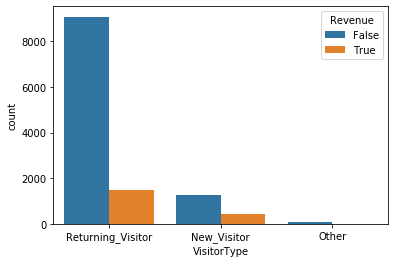

In [13]:
sns.countplot('VisitorType',data=cap,hue='Revenue',)  #this is for categorical of data
plt.show()

From the above graph we can see that most revenue is generated from Returning visitors and no form of revenue is generated from other users

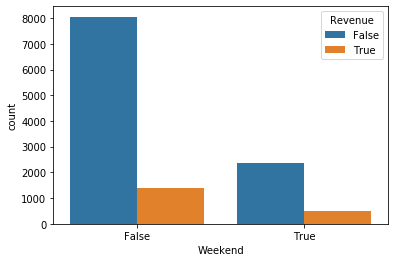

In [14]:
sns.countplot('Weekend',data=cap,hue='Revenue',)  

From the above graph we can see that most revenue is generated during weekdays and not on weekends

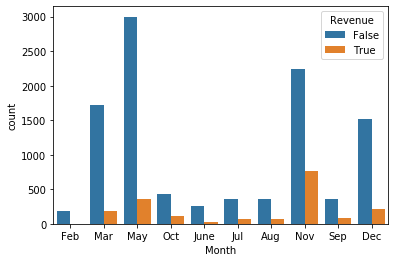

In [15]:
sns.countplot('Month',data=cap,hue='Revenue',)  

As you can see highest number of revenue generated from users who visited the website in the month of November

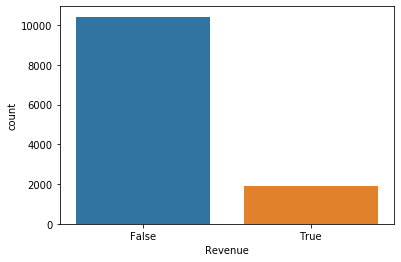

In [16]:
sns.countplot(x='Revenue',data=cap)

From the above countplot graph, it can be seen the data is highly imbalanced where approx.20% data is shared among True that is the revenue generator visitors and rest 80% are the non revenue generatoring visitors.



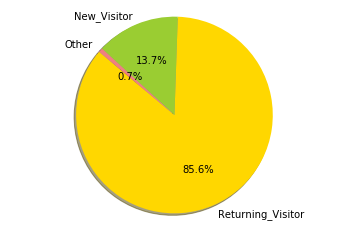

In [20]:
labels = 'Returning_Visitor', 'New_Visitor', 'Other'
sizes = [10551,  1694,  85]
colors = ['gold', 'yellowgreen', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

The above pie plot showing that distribution of the visitortype among the 3 cateogory : 1.)new_visitor = 13.7% 2.)returning_visitor = 85.6% 3.)others = 0.7% so,for now it can be said that the returning visitor may have major share in revenue generation as compared to the other two categories.



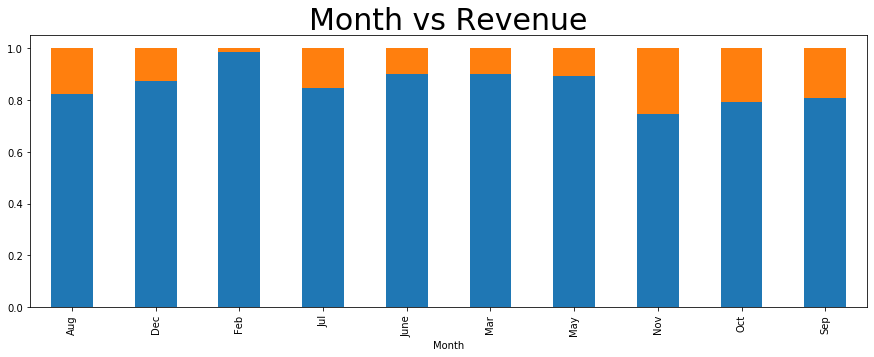

In [25]:

month  =  cap['Month'].sort_values(ascending=True)
df = pd.crosstab(month, cap['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5),legend = False)
plt.title('Month vs Revenue', fontsize = 30)
plt.show()


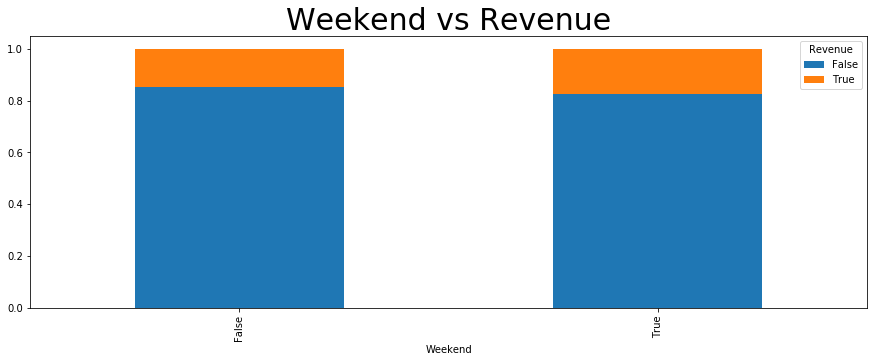

In [26]:

df1 = pd.crosstab(cap['Weekend'], cap['Revenue'])
df1.div(df1.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5))
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

from the above stacked bar plot, it can be observed that there is no significant difference in the weekend and weekdays.



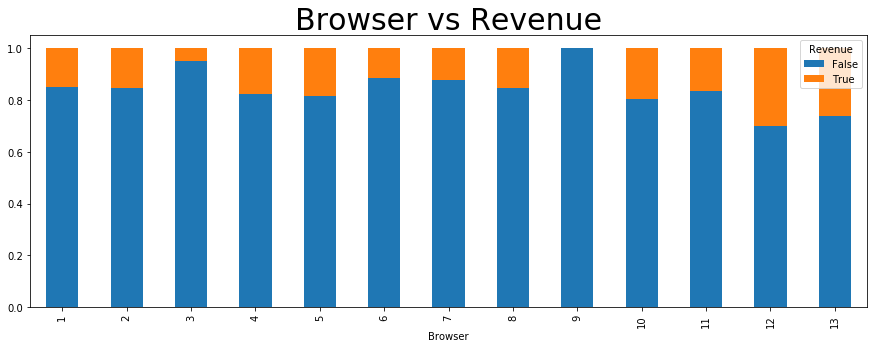

In [28]:
df2 = pd.crosstab(cap['Browser'], cap['Revenue'])
df2.div(df2.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5))
plt.title('Browser vs Revenue', fontsize = 30)
plt.show()

from the above stacked bar graph, it can be observed that the 12th browser have the highest revenue and the lowest or nill can be seen on the 9th browser.



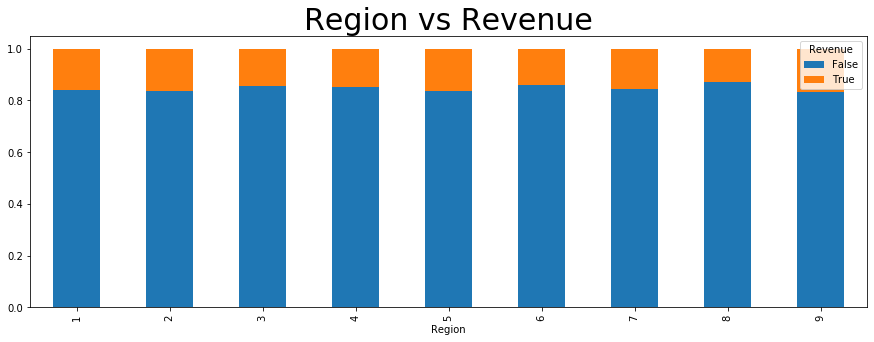

In [29]:

df3 = pd.crosstab(cap['Region'], cap['Revenue'])
df3.div(df3.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5))
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

from the above stackedbar graph, it can be seen that there is a slight difference between regions.



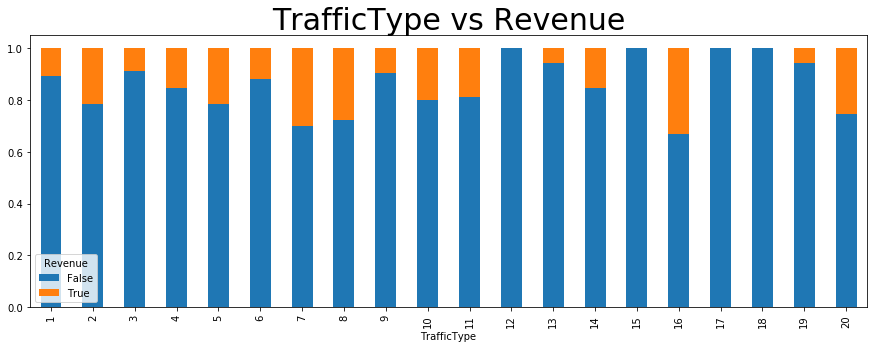

In [30]:
df4 = pd.crosstab(cap['TrafficType'], cap['Revenue'])
df4.div(df4.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5))
plt.title('TrafficType vs Revenue', fontsize = 30)
plt.show()

from the above stackedbar graph, it can be seen that the 7th and 16th are highest and the lowest is 12th



In [22]:
cap.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


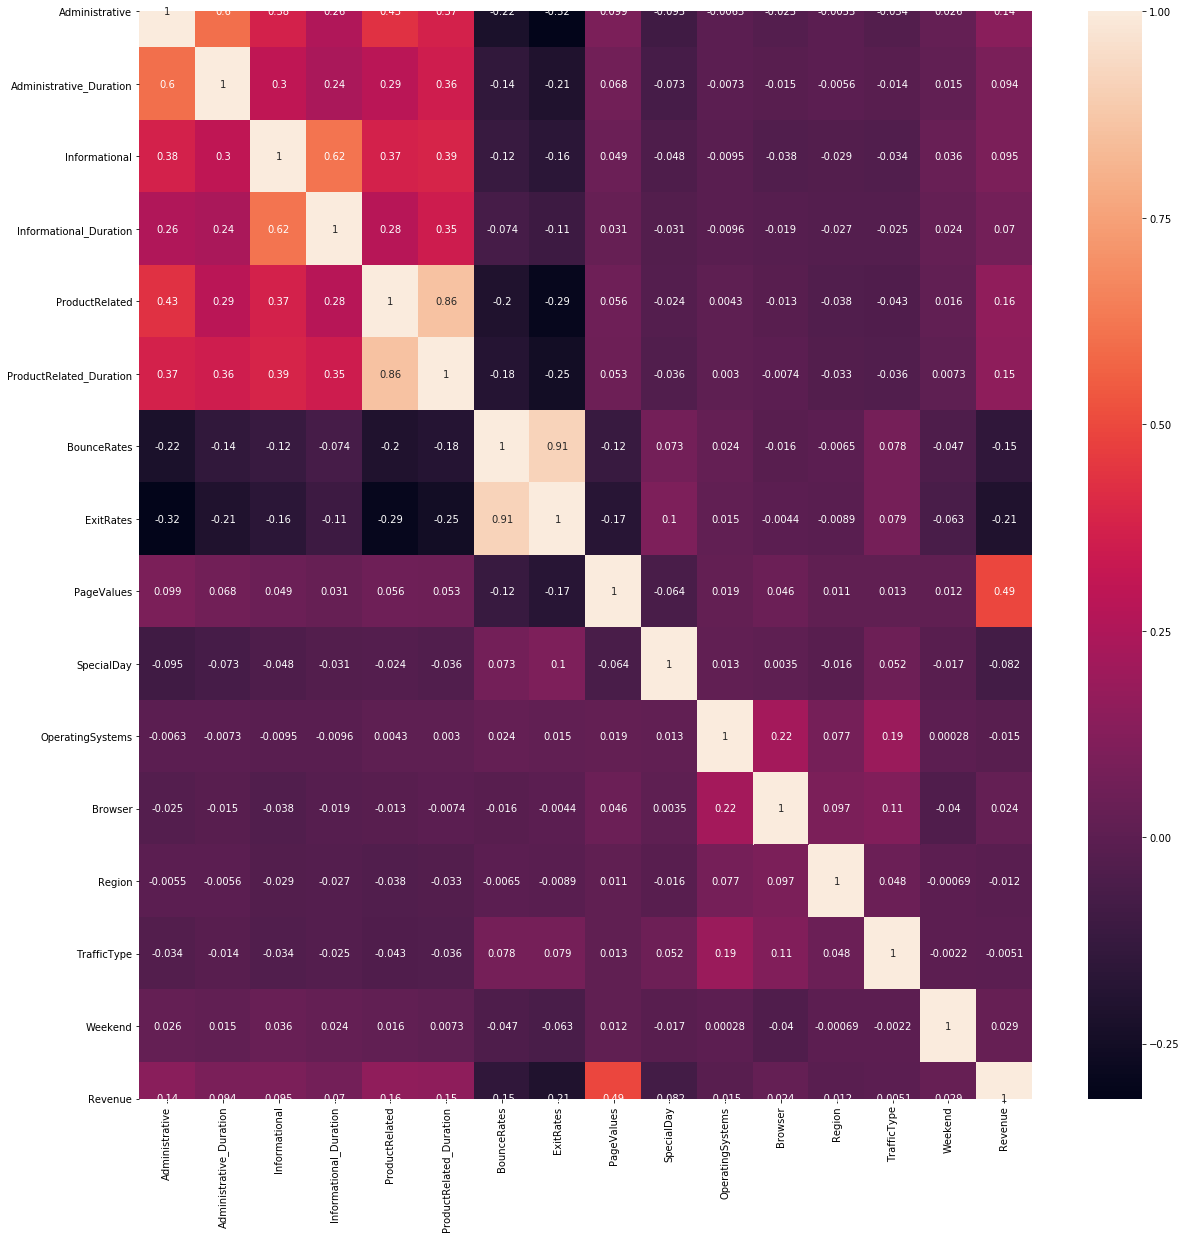

In [32]:
fig, ax = plt.subplots(1,1,figsize=(20,20))
sns.heatmap(cap.corr(), annot=True)

In [62]:
print(cap[['ExitRates','PageValues']].corr())


            ExitRates  PageValues
ExitRates    1.000000   -0.174498
PageValues  -0.174498    1.000000


ExitRates and PageValues are highly correlated .

checking for mulitcorrelarity.:
    
we will keep PageValues and drop the ExitValues as it is more correlated to the target variable.

In [63]:
X1=pd.get_dummies(cap, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=('Month','VisitorType','Weekend'), dtype=None)

In [64]:

X = X1.drop(['Revenue'],axis = 1)
y = cap['Revenue']
model  = LogisticRegression()


In [65]:
#Initializing RFE model
rfe = RFE(model)

In [76]:
X.shape

(12330, 26)

In [67]:
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False  True False False False  True  True False  True False False
 False False  True  True  True False  True  True  True  True False False
  True  True]
[ 6 13  1 11 10 14  1  1  2  1  3  5  7 12  1  1  1  4  1  1  1  1  9  8
  1  1]


In [68]:
cols = list(X.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 8)            
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y) 
#Fitting the data to model
model.fit(X_rfe,y)             
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['BounceRates', 'ExitRates', 'SpecialDay', 'Month_Feb', 'Month_June',
       'Month_Mar', 'Month_Nov', 'VisitorType_Returning_Visitor'],
      dtype='object')


In [78]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X_rfe.astype(float))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.297477
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.310    
Dependent Variable: Revenue          AIC:              7367.7789
Date:               2020-06-24 11:19 BIC:              7486.4955
No. Observations:   12330            Log-Likelihood:   -3667.9  
Df Model:           15               LL-Null:          -5312.4  
Df Residuals:       12314            LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     9.0000                                      
-----------------------------------------------------------------
          Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
-----------------------------------------------------------------
x1         0.0765    0.0196    3.8965  0.0001    0.0380    0.1150
x2         3.5376    3.3167    1.0666  0.2862   -2.9631   10.0383
x3      

In [70]:

X.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [71]:
#the actual rfe to be done:
#no of features
nof_list=np.arange(1,18)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 16
Score with 16 features: 0.872939


In [72]:
cols = list(X.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 16)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Informational', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Weekend', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov',
       'VisitorType_Other', 'VisitorType_Returning_Visitor'],
      dtype='object')


In [73]:
X.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [80]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X_rfe.astype(float))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.297477
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.310    
Dependent Variable: Revenue          AIC:              7367.7789
Date:               2020-06-24 11:20 BIC:              7486.4955
No. Observations:   12330            Log-Likelihood:   -3667.9  
Df Model:           15               LL-Null:          -5312.4  
Df Residuals:       12314            LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     9.0000                                      
-----------------------------------------------------------------
          Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
-----------------------------------------------------------------
x1         0.0765    0.0196    3.8965  0.0001    0.0380    0.1150
x2         3.5376    3.3167    1.0666  0.2862   -2.9631   10.0383
x3      